In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [5]:
df = pd.read_csv("../data/processed/bgg_proc.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20343 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20343 non-null  int64  
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20343 non-null  int64  
 12  Mechanics           20343 non-null  object 
 13  Domains             20343 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 2.2+ MB


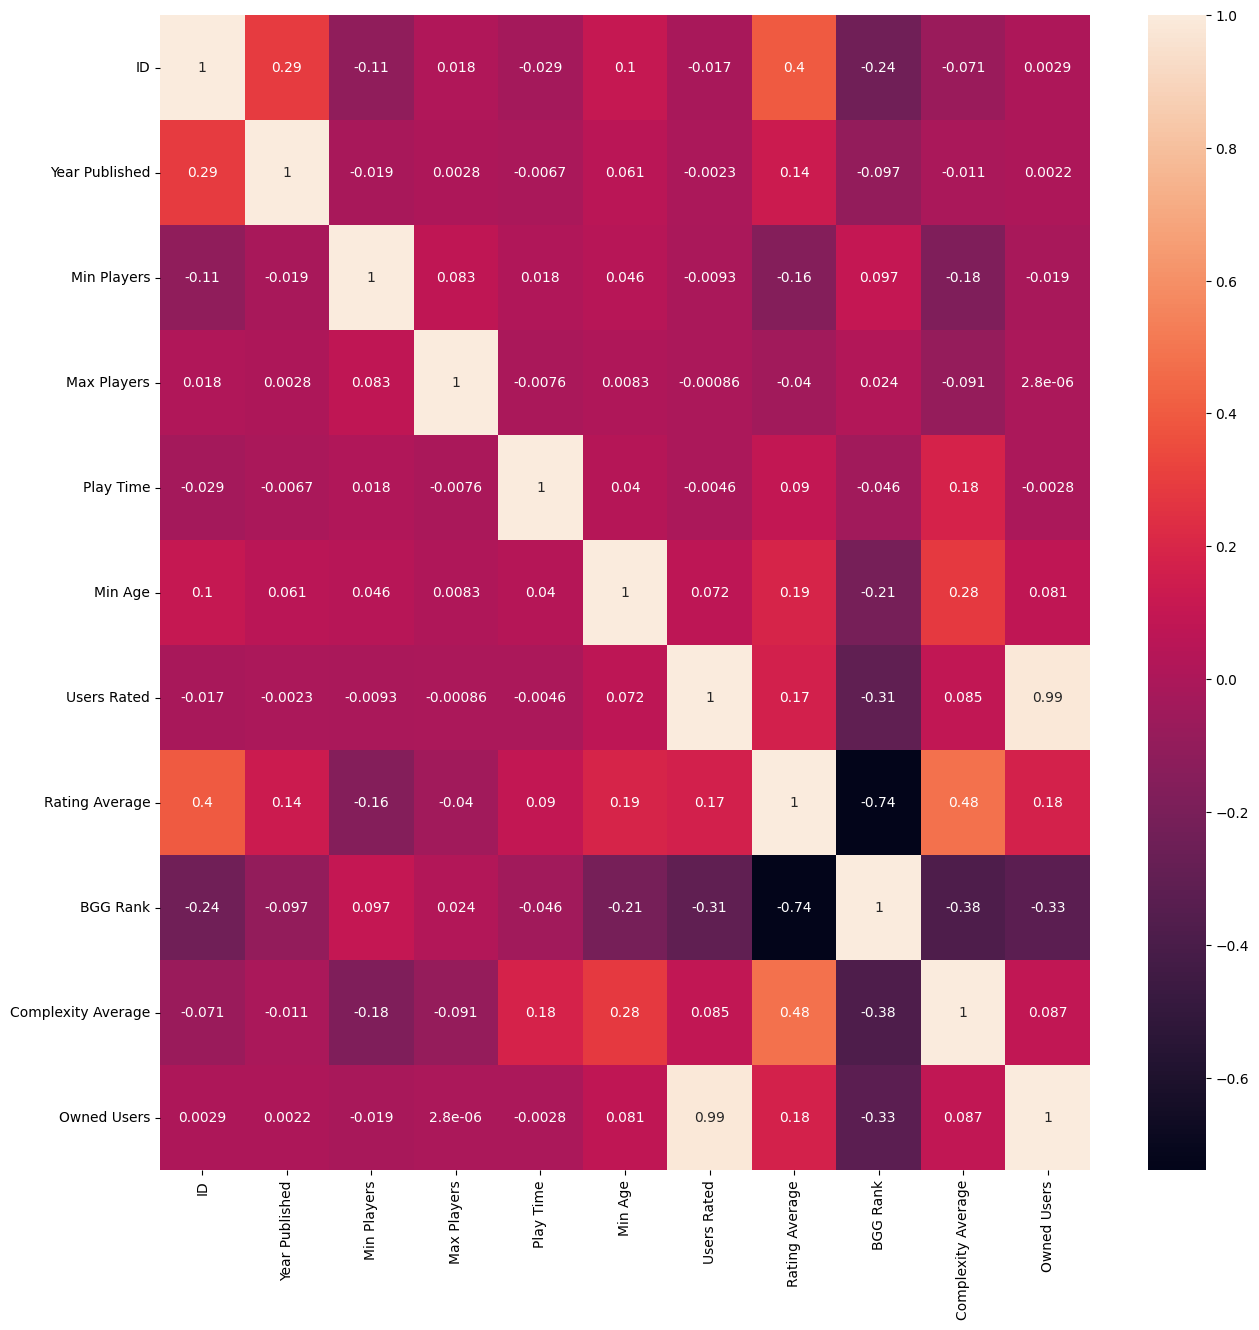

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

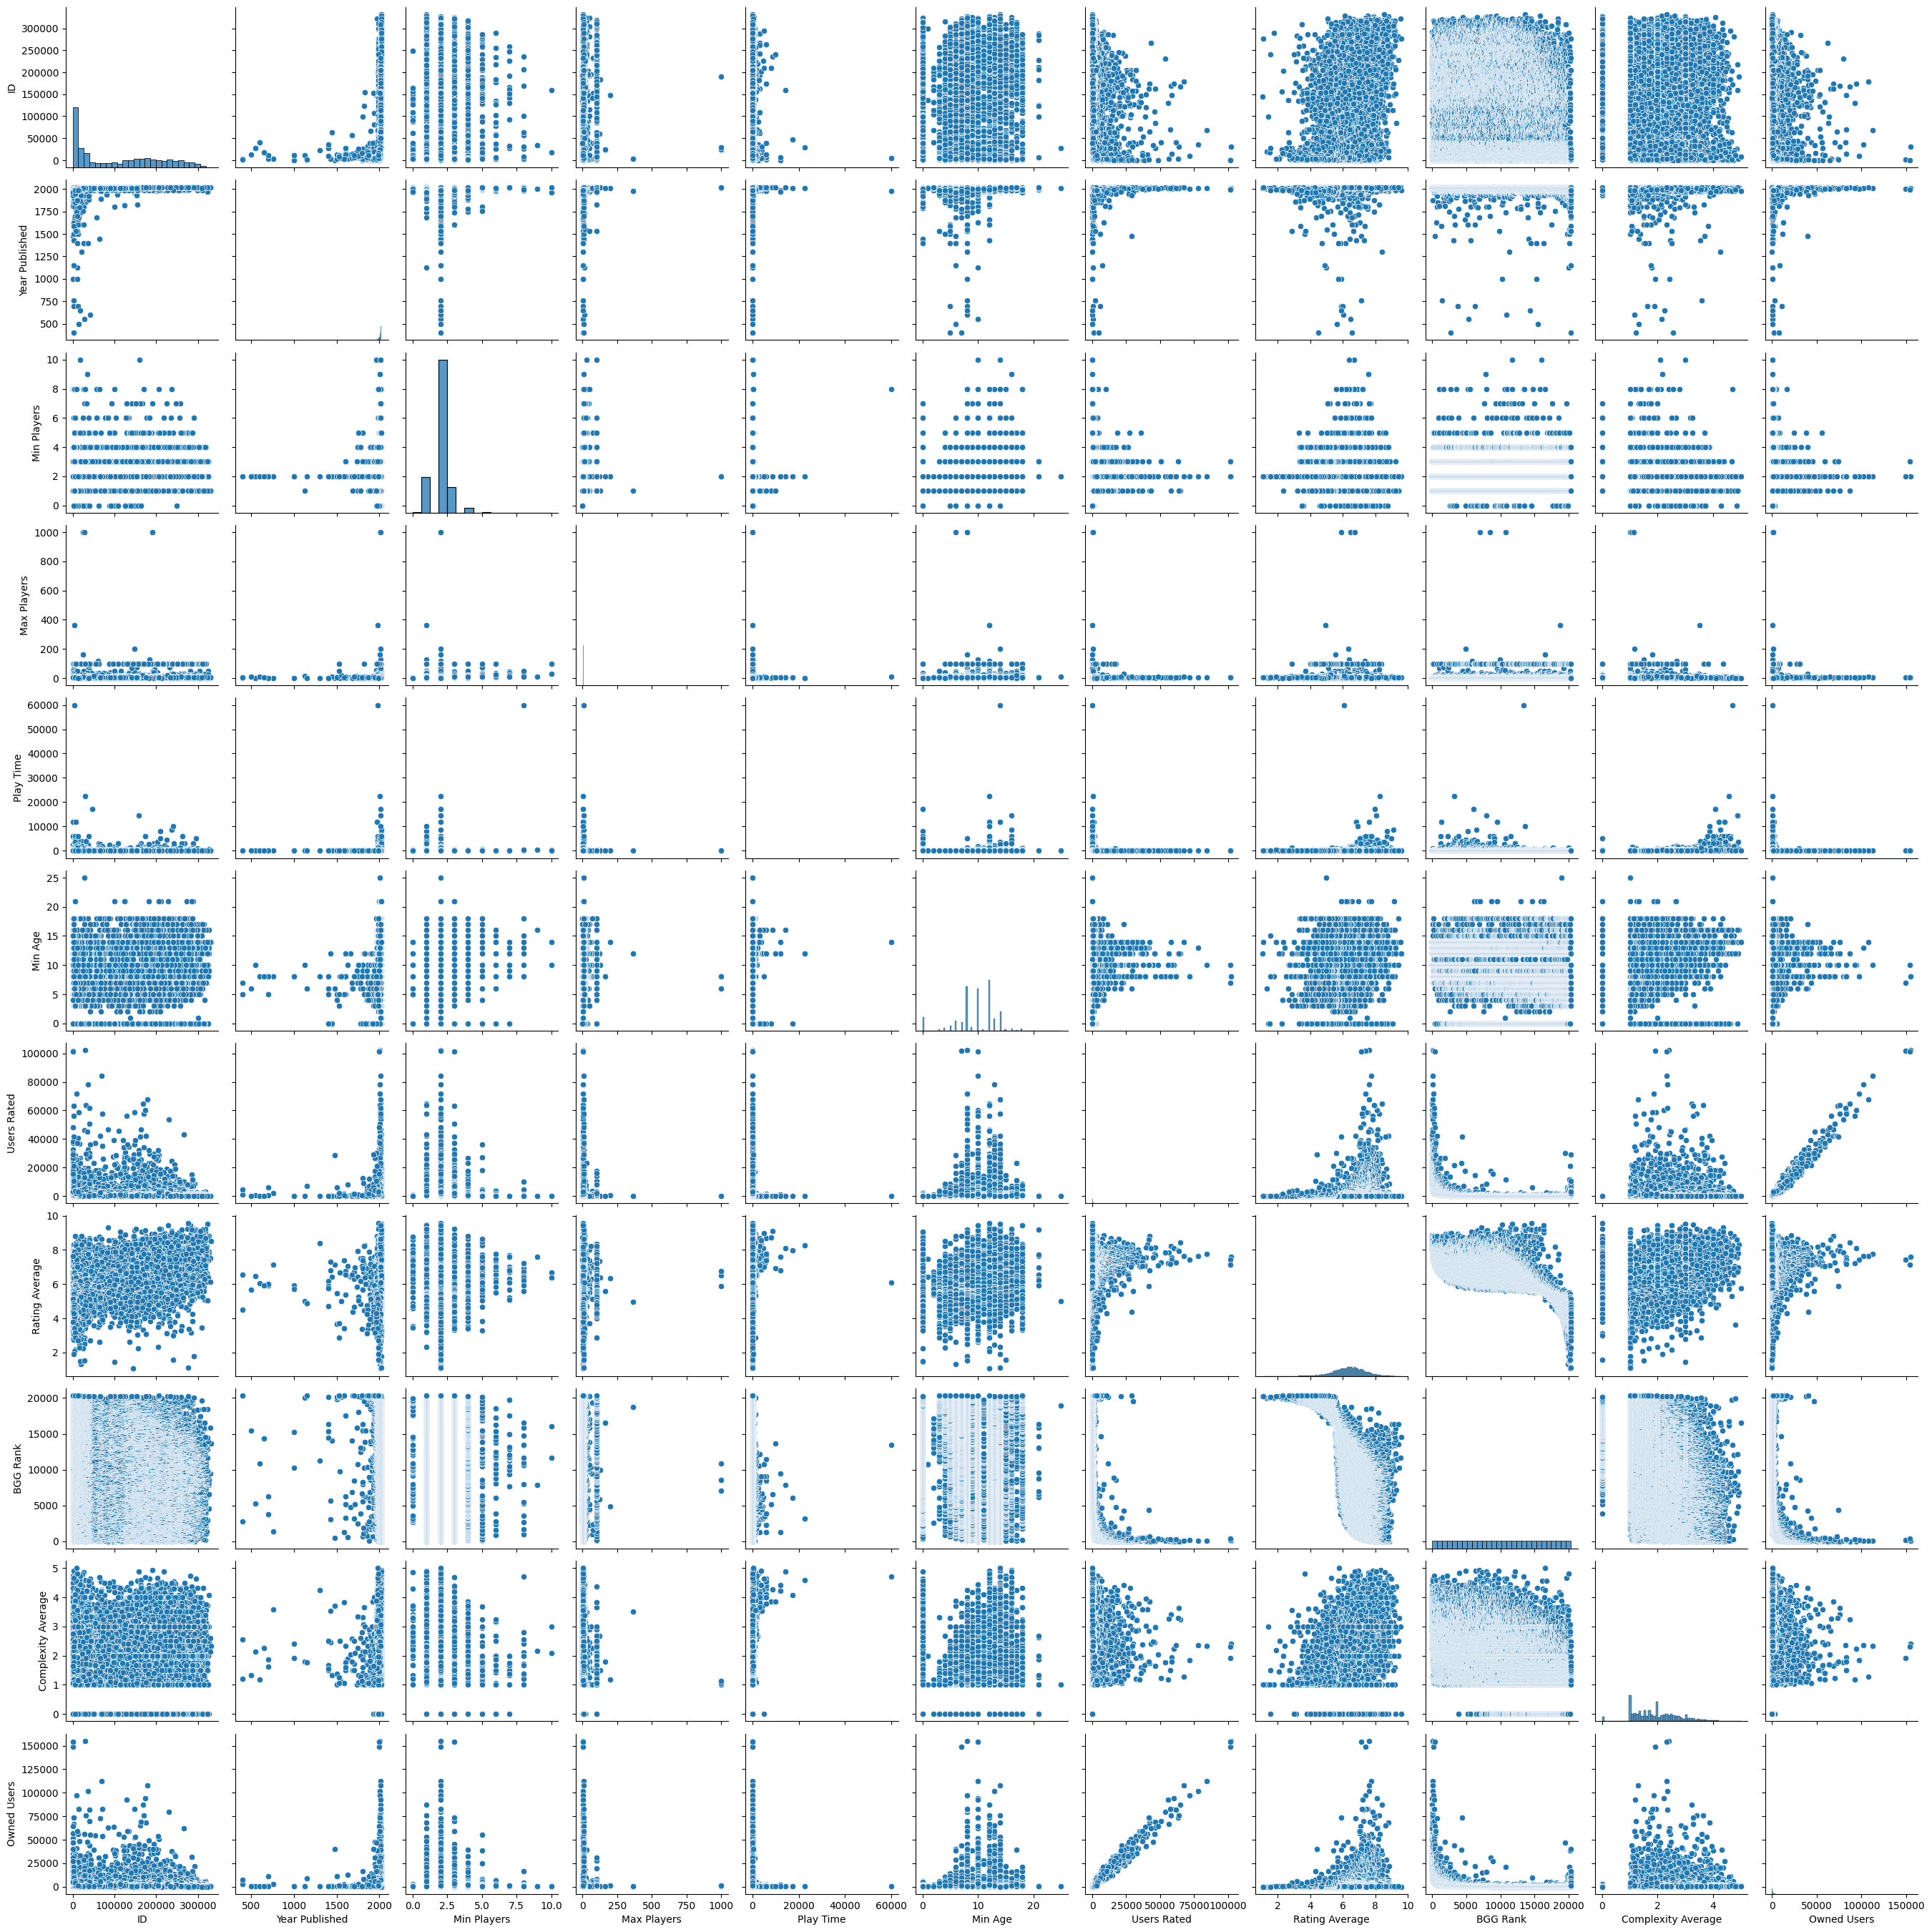

In [7]:
sns.pairplot(df)

In [37]:
X = df.drop(["Mechanics","Rating Average","Domains","ID","Name"],axis=1)
y = df["Rating Average"]

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train_scal)
X_train_poly = poly_reg.transform(X_train_scal)
X_test_poly = poly_reg.transform(X_test_scal)

pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_train_poly, y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_prediction = pol_reg_3.predict(X_train_poly)

print(pol_reg_3.score(X_train_poly, y_train))
print("MAE train", mean_absolute_error(y_train, train_prediction))
print("MSE train", mean_squared_error(y_train, train_prediction))

0.720973275914067
MAE train 0.3626882403764005
MSE train 0.24454647925417222


In [33]:
test_prediction = pol_reg_3.predict(X_test_poly)

print(pol_reg_3.score(X_test_poly, y_test))
print("MAE test", mean_absolute_error(y_test, test_prediction))
print("MSE test", mean_squared_error(y_test, test_prediction))

0.674794998851943
MAE test 0.3697312213077874
MSE test 0.2841376388342442


In [95]:
dtr = DecisionTreeRegressor(max_depth = 10,max_features =5, random_state=0)
dtr.fit(X_train, y_train)
# dtr.fit(X_train_scal, y_train)

DecisionTreeRegressor(max_depth=10, max_features=5, random_state=0)

In [96]:
dtr.score(X_train, y_train)

0.9178829302028808

In [97]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.8568495666725902
MAE 0.2274323626909002
MAPE 0.03510025438286001
MSE 0.12507318762060243
RMSE 0.35365687837309545


In [53]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=0)

parameters = {"max_depth":[3,5],
              "criterion": ['absolute_error'],
              "min_samples_split": [2,3,4],
              "min_samples_leaf": [2,3,4],
              "max_features": [3,5,7]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [54]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['absolute_error'], 'max_depth': [3, 5],
                         'max_features': [3, 5, 7],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='neg_mean_absolute_error')

In [55]:
dtr_gs.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=5,
                      min_samples_leaf=3, random_state=0)

In [57]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.7511370751440918
MAE 0.3217031211599902
MAPE 0.049930928862564755
MSE 0.21743615138854758
RMSE 0.4663004947333292
